# 图像特效-拉普拉斯锐化

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [5]:
def laplacian_sharpen(src):
    kernel = np.array([
        [-1,-1,-1],
        [-1,9,-1],
        [-1,-1,-1]
    ])
    srcf = src.astype(np.float32)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dstr =  signal.convolve2d(srcf[:,:,0],kernel, boundary='symm', mode='same')
    dstg =  signal.convolve2d(srcf[:,:,1],kernel, boundary='symm', mode='same')
    dstb =  signal.convolve2d(srcf[:,:,2],kernel, boundary='symm', mode='same')
    dst = cv2.merge([dstr,dstg,dstb])
    dst[dst > 255] = 255
    dst[dst < 0] = 0
    return dst.astype(np.uint8)

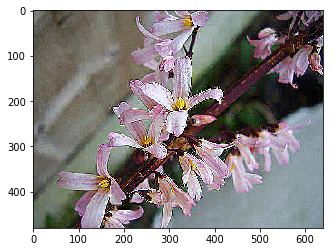

In [6]:
dst = laplacian_sharpen(rgb)
plt.imshow(dst)